#                                                     WEATHER FORECASTING

#  1.Introduction

In [ ]:
Purpose of this project is to predict the temperature using different algorithms like linear regression, random forest regression, and Decision tree 
regression. The output value is numerically based on multiple extra factors like maximum temperature, minimum temperature, cloud cover, humidity,
and sun hours in a day, precipitation, pressure and wind speed.

## 2.Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')


# 3.Loading the Dataset

# Reading CSV file as weather_df and making date_time column as index of dataframe


In [5]:
weather_df = pd.read_csv('delhi.csv', parse_dates=['date_time'], index_col='date_time')
weather_df.head(5)


,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,14,19,0,50,0.0,1016,10,10,331,12
2009-01-01 01:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,13,21,0,51,0.0,1016,10,10,329,13
2009-01-01 02:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,12,22,0,52,0.0,1016,9,10,327,13
2009-01-01 03:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,11,23,0,54,0.0,1016,9,10,326,13
2009-01-01 04:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,11,21,2,52,0.0,1016,9,10,318,13


# 4.Data Exploration

# Checking columns in the dataframe

In [6]:
weather_df.columns

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [7]:
# Display the first 5 rows of the dataset
weather_df.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,14,19,0,50,0.0,1016,10,10,331,12
2009-01-01 01:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,13,21,0,51,0.0,1016,10,10,329,13
2009-01-01 02:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,12,22,0,52,0.0,1016,9,10,327,13
2009-01-01 03:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,11,23,0,54,0.0,1016,9,10,326,13
2009-01-01 04:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,11,21,2,52,0.0,1016,9,10,318,13


Shape of the dataset

In [8]:
weather_df.shape

(96432, 24)

In [9]:
#Statistical summary
weather_df.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,96432.000000,96432.000000,96432.0,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,32.681434,21.505475,0.0,11.213489,6.736685,4.390316,46.094077,12.170929,30.486270,30.608543,29.072569,11.983501,14.485119,41.323254,0.032072,1006.972333,26.672484,9.913307,214.948689,8.795151
std,7.479931,8.245626,0.0,2.155831,1.656212,3.372834,31.249725,8.049545,9.853813,9.708888,8.581811,6.182597,20.518663,21.351832,0.287923,7.789316,8.917470,0.992465,101.676151,4.329033
min,12.000000,1.000000,0.0,3.800000,3.000000,1.000000,0.000000,-22.000000,4.000000,5.000000,4.000000,0.000000,0.000000,2.000000,0.000000,987.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,14.000000,0.0,8.700000,5.000000,1.000000,18.000000,6.000000,23.000000,24.000000,23.000000,7.000000,0.000000,24.000000,0.000000,1000.000000,20.000000,10.000000,116.000000,6.000000
50%,34.000000,23.000000,0.0,11.600000,7.000000,5.000000,46.000000,11.000000,31.000000,31.000000,30.000000,11.000000,5.000000,38.000000,0.000000,1007.000000,28.000000,10.000000,259.000000,8.000000
75%,38.000000,28.000000,0.0,13.200000,8.000000,8.000000,73.000000,20.000000,38.000000,38.000000,35.000000,16.000000,21.000000,56.000000,0.000000,1014.000000,33.000000,10.000000,303.000000,11.000000
max,52.000000,43.000000,0.0,14.000000,11.000000,11.000000,100.000000,30.000000,65.000000,65.000000,54.000000,72.000000,100.000000,100.000000,17.600000,1025.000000,51.000000,20.000000,360.000000,44.000000


# Checking null values in dataset

In [10]:
weather_df.isnull().sum()

maxtempC             0
mintempC             0
totalSnow_cm         0
sunHour              0
uvIndex              0
uvIndex.1            0
moon_illumination    0
moonrise             0
moonset              0
sunrise              0
sunset               0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
dtype: int64

In [ ]:
There is no null values in the dataset.

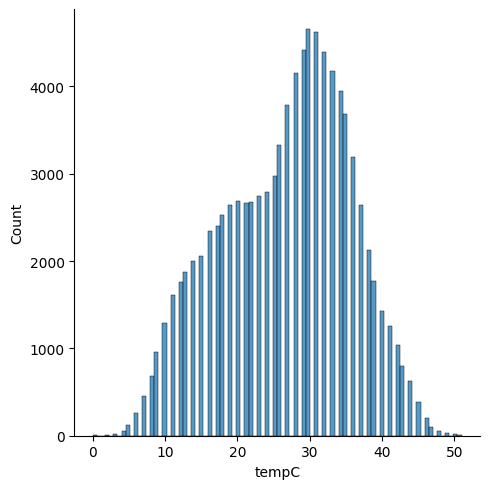

In [10]:
#To find outliers
sns.displot(weather_df["tempC"])

<Axes: ylabel='tempC'>

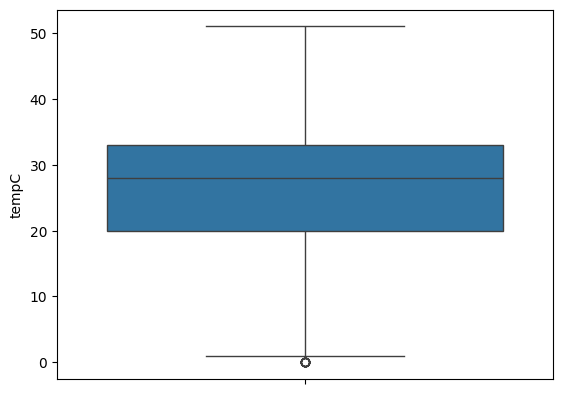

In [11]:
sns.boxplot(weather_df['tempC'])

In [ ]:
Here no outliers found

In [15]:
weather_df_new=weather_df.loc[:,['maxtempC','mintempC','cloudcover','humidity','tempC', 'sunHour','HeatIndexC', 'precipMM', 'pressure','windspeedKmph']]
weather_df_new.head()


,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2009-01-01 00:00:00,22,9,0,50,10,8.7,14,0.0,1016,12
2009-01-01 01:00:00,22,9,0,51,10,8.7,14,0.0,1016,13
2009-01-01 02:00:00,22,9,0,52,9,8.7,13,0.0,1016,13
2009-01-01 03:00:00,22,9,0,54,9,8.7,13,0.0,1016,13
2009-01-01 04:00:00,22,9,2,52,9,8.7,13,0.0,1016,13


# New Dataframe's shape

In [16]:
weather_df_new.shape

(96432, 10)

# Columns in new dataframe

In [17]:
weather_df_new.columns

Index(['maxtempC', 'mintempC', 'cloudcover', 'humidity', 'tempC', 'sunHour',
       'HeatIndexC', 'precipMM', 'pressure', 'windspeedKmph'],
      dtype='object')

# 5.Data Visualization

In [13]:
#Ploting all the column values

array([[<Axes: title={'center': 'maxtempC'}>,
        <Axes: title={'center': 'mintempC'}>,
        <Axes: title={'center': 'cloudcover'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'tempC'}>,
        <Axes: title={'center': 'sunHour'}>],
       [<Axes: title={'center': 'HeatIndexC'}>,
        <Axes: title={'center': 'precipMM'}>,
        <Axes: title={'center': 'pressure'}>],
       [<Axes: title={'center': 'windspeedKmph'}>, <Axes: >, <Axes: >]],
      dtype=object)

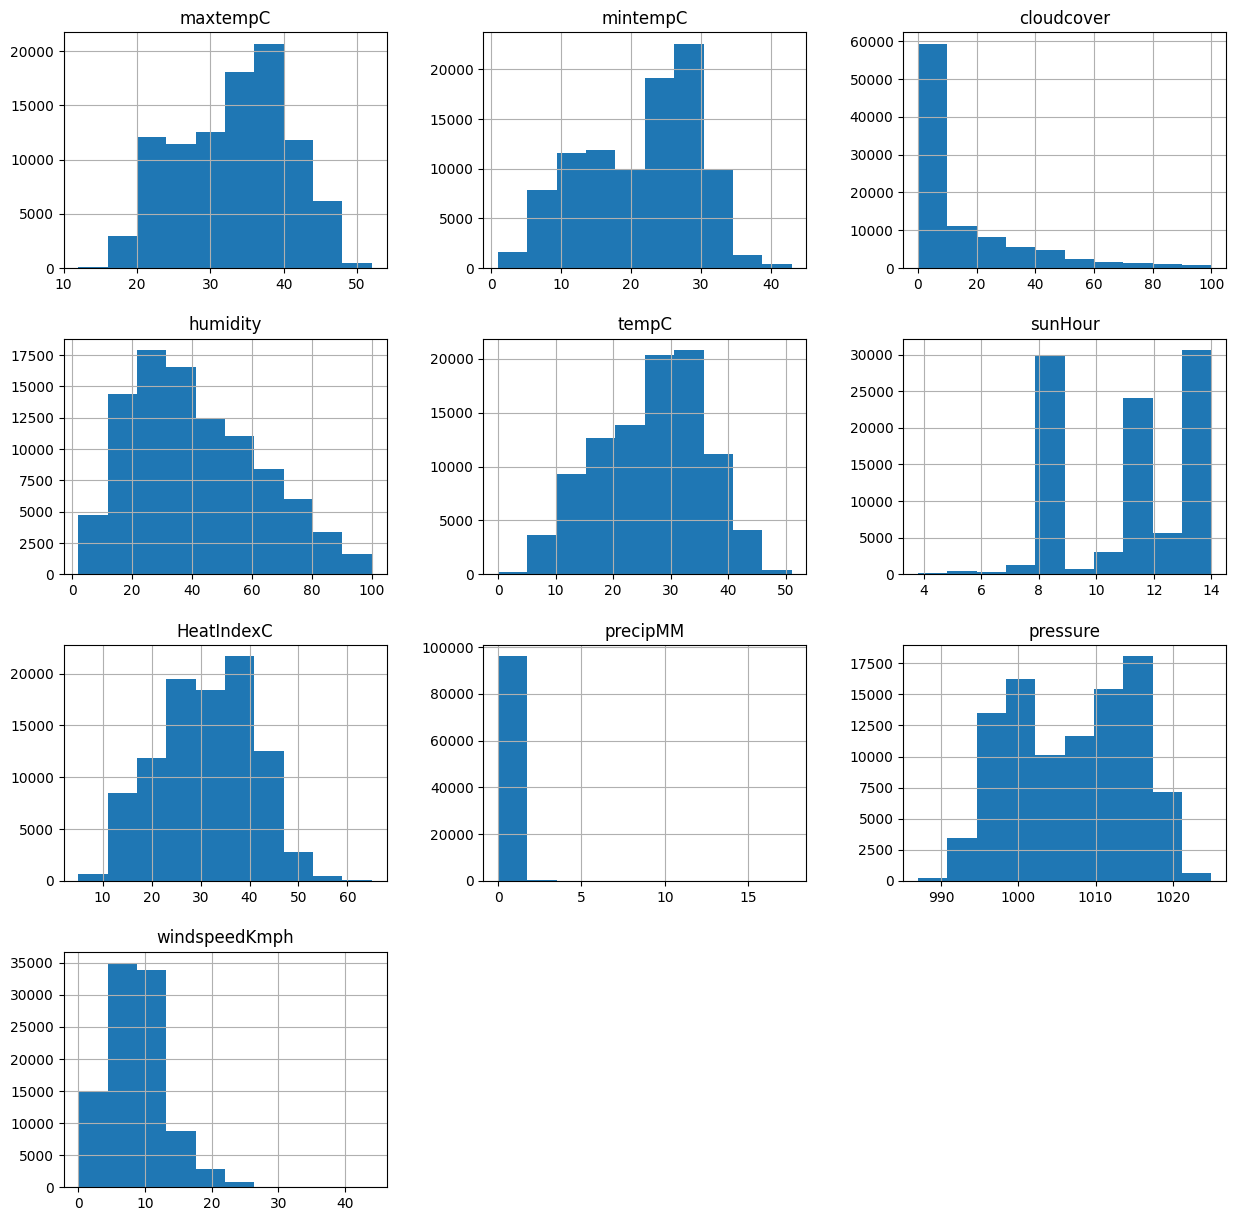

In [18]:
weather_df_new.hist(bins=10,figsize=(15,15))

# 6. Data Preparation

In [16]:
#Slicing the Dataframe 'weather_df_new' to include only the rows with dates from January 1,2019 to December 31,2020

In [19]:
weth=weather_df_new['2019':'2020']
weth.head() 

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2019-01-01 00:00:00,23,18,0,30,20,8.7,20,0.0,1020,6
2019-01-01 01:00:00,23,18,0,31,20,8.7,20,0.0,1020,6
2019-01-01 02:00:00,23,18,0,31,20,8.7,20,0.0,1020,6
2019-01-01 03:00:00,23,18,0,31,19,8.7,19,0.0,1020,6
2019-01-01 04:00:00,23,18,0,32,19,8.7,19,0.0,1020,6


In [ ]:
separatig the feature (i.e. temperature) to be predicted from the rest of the featured.weather_y has temperature column,
weather_x stores the rest of the dataset

In [20]:
weather_y=weather_df_new.pop("tempC")
weather_x=weather_df_new

In [21]:
# Split the data into training and testing sets (80% training, 20% testing)
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=0)

In [ ]:
#Display the shapes of the training and testing sets

In [22]:
print("Shape of X_train: ",train_X.shape)
print("Shape of X_test: ",test_X.shape) 
print("Shape of y_train: ",train_y.shape)
print("Shape of y_test: ",test_y.shape)


Shape of X_train:  (77145, 9)
Shape of X_test:  (19287, 9)
Shape of y_train:  (77145,)
Shape of y_test:  (19287,)


In [23]:
train_y.head()

date_time
2013-04-26 04:00:00    29
2019-01-20 05:00:00    18
2015-05-27 02:00:00    29
2012-02-21 15:00:00    20
2010-05-12 21:00:00    29
Name: tempC, dtype: int64

# A. Linear Regression

In [24]:
# Instantiating the object and fitting

model=LinearRegression()
model.fit(train_X,train_y)


LinearRegression()

In [25]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)


LinearRegression()

In [26]:
#predicting the values

prediction1 = model.predict(test_X)


#   Error Calculation

In [27]:
np.mean(np.absolute(prediction1-test_y))

1.3124547010839966

In [28]:
print('Variance score: %.2f' % model.score(test_X, test_y))

Variance score: 0.96


In [40]:
for i in range(len(prediction1)):
  prediction1[i]=round(prediction1[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction1,'diff':(test_y-prediction1)})


,Actual,Prediction,diff
date_time,,,
2018-01-24 06:00:00,11,8.67,2.33
2012-11-11 20:00:00,20,20.83,-0.83
2019-09-19 11:00:00,31,31.22,-0.22
2009-07-19 06:00:00,30,30.55,-0.55
2009-08-22 07:00:00,30,29.32,0.68
...,...,...,...
2011-12-07 13:00:00,25,23.88,1.12
2009-02-22 22:00:00,17,17.93,-0.93
2019-12-04 22:00:00,25,22.87,2.13


#  Calculating R2-score for Linear Regression

In [29]:


print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction1 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction1 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction1 ) )


Mean absolute error: 1.31
Residual sum of squares (MSE): 3.03
R2-score: 0.96


#  B. Decision Tree Regression

In [30]:
from sklearn.tree import DecisionTreeRegressor

#Instantiating the object and fitting

regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X ,train_y)


DecisionTreeRegressor(random_state=0)

In [31]:
# Predicting the values

prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))

0.6363872038160419

In [32]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))


Variance score: 0.98


In [48]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})


,Actual,Prediction,diff
date_time,,,
2018-01-24 06:00:00,11,11.0,0.0
2012-11-11 20:00:00,20,20.0,0.0
2019-09-19 11:00:00,31,31.0,0.0
2009-07-19 06:00:00,30,30.0,0.0
2009-08-22 07:00:00,30,30.0,0.0
...,...,...,...
2011-12-07 13:00:00,25,27.0,-2.0
2009-02-22 22:00:00,17,17.0,0.0
2019-12-04 22:00:00,25,25.0,0.0


## R2-score for Decision Tree Regression

In [33]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )

Mean absolute error: 0.64
Residual sum of squares (MSE): 1.28
R2-score: 0.98


# C.Random forest regression

In [34]:
# Importing module
from sklearn.ensemble import RandomForestRegressor

# Instantiating the object and fitting

regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)


RandomForestRegressor(max_depth=90, random_state=0)

In [35]:
# Predicting the values

prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_y))


0.5204139707558592

In [36]:
print('Variance score: %.2f' % regr.score(test_X, test_y))


Variance score: 0.99


In [37]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

,Actual,Prediction,diff
date_time,,,
2018-01-24 06:00:00,11,10.97,0.03
2012-11-11 20:00:00,20,19.72,0.28
2019-09-19 11:00:00,31,30.71,0.29
2009-07-19 06:00:00,30,30.59,-0.59
2009-08-22 07:00:00,30,29.96,0.04
...,...,...,...
2011-12-07 13:00:00,25,26.92,-1.92
2009-02-22 22:00:00,17,17.09,-0.09
2019-12-04 22:00:00,25,24.47,0.53


##  R2 score of  Random forest regression

In [38]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction3 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )


Mean absolute error: 0.52
Residual sum of squares (MSE): 0.66
R2-score: 0.99


# Conclusion

In [ ]:
#Linear Regression: 

This regression model has high mean absolute error, hence turned out to be the least accurate model. 

# Decision Tree Regression: 
    
This regression model has medium mean absolute error, hence turned out to be the little accurate model. 


# Random Forest Regression:
    
This regression model has low mean absolute error, hence turned out to be the more accurate model. 